In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Here im reading VLASS Quick Look data of epoch1
- I have tailored and selected the columns i need from 70 columns in main table
- from csv i have converted the file to apache parquet format (suitable for big data operations)

In [5]:
file_path = "/home/vivek/Desktop/Ms-paper/Quick_look1_r.parquet"

# Read the CSV file in chunks
df = pd.read_parquet(file_path)

# lets see the first 5 rows 

In [6]:
df.head()

,Component_name,Component_id,RA,DEC,Total_flux,Peak_flux,NVSS_distance,FIRST_distance,Duplicate_flag,Quality_flag,Source_type
0,VLASS1QLCIR J000000.04+800045.6,90,0.000177,80.012667,0.818652,0.752668,2.621770,101649.619740,0,2,N/
1,VLASS1QLCIR J000000.05+441010.5,4,0.000222,44.169596,5.166948,1.068693,19.433964,104502.389639,0,11,N/
2,VLASS1QLCIR J000000.07-062930.6,63,0.000296,-6.491848,1.905655,1.204416,105.235342,287.858167,0,0,SC
3,VLASS1QLCIR J000000.08+275057.9,-6,0.000369,27.849437,0.000000,1.149879,127.144526,46260.957406,0,4,N/
4,VLASS1QLCIR J000000.08+190239.5,36,0.000373,19.044331,4.456763,2.734357,86.250334,14750.693914,2,0,N/


# Now the last 5 rows

In [7]:
df.tail()

,Component_name,Component_id,RA,DEC,Total_flux,Peak_flux,NVSS_distance,FIRST_distance,Duplicate_flag,Quality_flag,Source_type
3381272,VLASS1QLCIR J235959.94+361624.4,1,359.999759,36.273452,6.216199,4.353328,0.744776,76229.631594,1,0,SC
3381273,VLASS1QLCIR J235959.94-313449.4,-25,359.999775,-31.580402,0.000000,3.961394,101.275293,72431.273124,0,4,N/
3381274,VLASS1QLCIR J235959.95-311435.2,-85,359.999793,-31.243116,0.000000,1.217973,279.514119,71217.046438,0,4,N/
3381275,VLASS1QLCIR J235959.96+333602.9,-1,359.999836,33.600828,0.000000,0.891518,188.959299,66687.696458,0,4,N/
3381276,VLASS1QLCIR J235959.99-034346.5,0,359.999999,-3.729597,2.509144,2.151774,190.762281,182.056202,0,9,N/


In [8]:
x =  df['Peak_flux']
print(x)

0          0.752668
1          1.068693
2          1.204416
3          1.149879
4          2.734357
             ...   
3381272    4.353328
3381273    3.961394
3381274    1.217973
3381275    0.891518
3381276    2.151774
Name: Peak_flux, Length: 3381277, dtype: float64


# Now lets see the peak brigtness of the catalogue data vs quality flag = 0

In [9]:

# Separate the data into two groups based on Quality_flag
all_components = df['Peak_flux'].sort_values()
quality_flag_0_components = df[df['Quality_flag'] == 0]['Peak_flux'].sort_values()


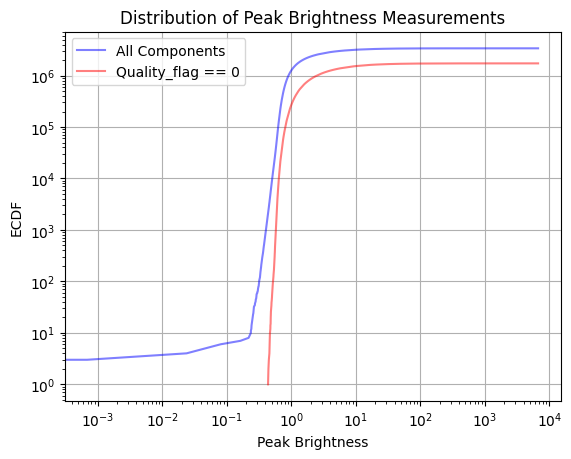

In [14]:
# Create the y-axis values for the line plot
y_all = np.arange(1, len(all_components)+1) 
y_quality_flag_0 = np.arange(1, len(quality_flag_0_components)+1) 

# Plot the line plots for all components and Quality_flag == 0 components
plt.plot(all_components, y_all, color='blue', alpha=0.5, label='All Components')
plt.plot(quality_flag_0_components, y_quality_flag_0, color='red', alpha=0.5, label='Quality_flag == 0')
plt.xlabel('Peak Brightness')
plt.ylabel('ECDF')
plt.xscale('log')
plt.yscale('log')
plt.xlim()
plt.title('Distribution of Peak Brightness Measurements')
plt.legend()
plt.grid(True)
plt.show()

3381277

AttributeError: 'int' object has no attribute 'count'